In [1]:
import neural_networks
import matplotlib.pyplot as plt
import numpy as np

#### Data Preprocessing
1. Tried Normalization - Both Min-Max and Gaussian Normalization i tried but they gave worse results. 

In [2]:
from mlxtend.data import loadlocal_mnist

In [3]:
test_X, test_Y=loadlocal_mnist(images_path='dataset/t10k-images.idx3-ubyte', labels_path='dataset/t10k-labels.idx1-ubyte')
train_X, train_Y=loadlocal_mnist(images_path='dataset/train-images.idx3-ubyte', labels_path='dataset/train-labels.idx1-ubyte')

# Data dividing into test , train , validation

In [4]:
import pandas as pd
import numpy as np
total_data_X=[]
total_data_Y=[]
for i in range(len(train_Y)):
  mylist=list(train_X[i].ravel())
  total_data_X.append(mylist)
  total_data_Y.append(train_Y[i])
for i in range(len(test_Y)):
  mylist=list(test_X[i].ravel())
  total_data_X.append(mylist)
  total_data_Y.append(test_Y[i])

total_data_X=np.array(total_data_X)
#total_data_X = total_data_X/255 
total_data_Y=np.array(total_data_Y)



def mytraintestvalsplit(total,valsize,testsize):
    notestrows=int(testsize*total.shape[0])
    novalrows=int(valsize*total.shape[0])
    notrainrows=total.shape[0]-notestrows-novalrows
    trainrows=total[:notrainrows]
    valrows=total[notrainrows:notrainrows+novalrows]
    testrows=total[notrainrows+novalrows:]
    return trainrows,valrows,testrows

X_train, X_val,X_test = mytraintestvalsplit(total_data_X, 0.2,0.1)
Y_train, Y_val,Y_test = mytraintestvalsplit(total_data_Y, 0.2,0.1)


In [5]:
nn = neural_networks.NN(6, [784, 256, 128, 64, 32, 10], 'relu', 0.1, 'normal', len(X_train)//20, 30)
nn.fit(X_train,Y_train,X_val,Y_val)
print()
print("The Accuracy Score for Relu Activation is with normal Initialization is")
print(nn.score(X_test,Y_test))

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 
The Accuracy Score for Relu Activation is with normal Initialization is
0.9478571428571428


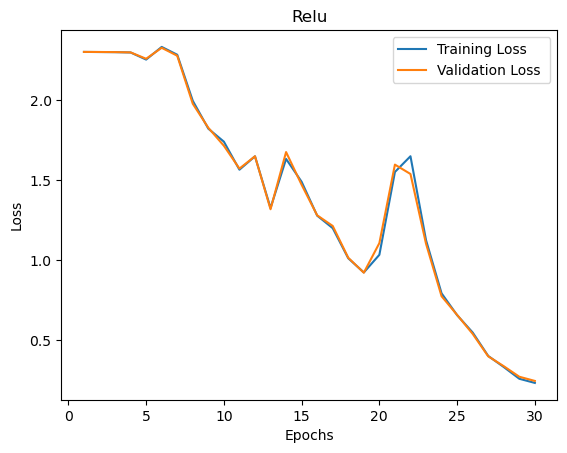

In [7]:
alltheweights={}
alltheweights['relu'] = nn.params
plt.plot(list(range(1,len(nn.train_losses) + 1)),nn.train_losses, label = "Training Loss " )
plt.plot(list(range(1,len(nn.val_losses) + 1)),nn.val_losses, label = "Validation Loss " )
plt.ylabel('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.title("Relu")
plt.show()

In [10]:
nn = neural_networks.NN(6, [784, 256, 128, 64, 32, 10], 'relu', 0.08, 'normal', len(X_train)//20, 30)
nn.fit(X_train,Y_train,X_val,Y_val)
print()
print("The Accuracy Score for Relu Activation is with normal Initialization is")
print(nn.score(X_test,Y_test))


Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 
The Accuracy Score for Relu Activation is with normal Initialization is
0.861


In [11]:
alltheweights={}
alltheweights['relu'] = nn.params
print(alltheweights['relu'])


{'b1': array([[-1.56893561e-05, -1.15825096e-05, -2.41079062e-05,
        -5.38508623e-05, -6.55510260e-05, -7.59930626e-05,
        -2.50314360e-04, -1.19548163e-04, -3.41853136e-05,
        -4.53058062e-05,  8.32991683e-06, -5.26804144e-05,
        -4.44882097e-06,  1.05881104e-04, -1.23165361e-05,
         5.50849820e-05, -1.82055182e-05, -2.81744252e-04,
         4.71273482e-05, -1.29683658e-04, -7.48916218e-05,
        -4.29451927e-05, -3.24913640e-05,  2.72072251e-05,
         1.17727397e-06, -7.56800903e-05, -3.59553035e-05,
        -7.12604812e-05, -1.01329678e-04, -1.45981161e-04,
        -5.11241875e-05, -2.24709657e-05, -1.91640003e-04,
        -4.28621583e-05, -2.67151076e-05, -2.22046735e-05,
        -9.02026544e-05, -2.80241507e-04, -1.26862371e-04,
         1.26032816e-05, -1.45255299e-05, -7.39325402e-06,
        -2.37711693e-05, -1.08855271e-04, -2.03003393e-05,
        -4.09165193e-05, -8.09600711e-05, -4.81825597e-05,
        -1.29319411e-04, -5.96794602e-05, -1.4009

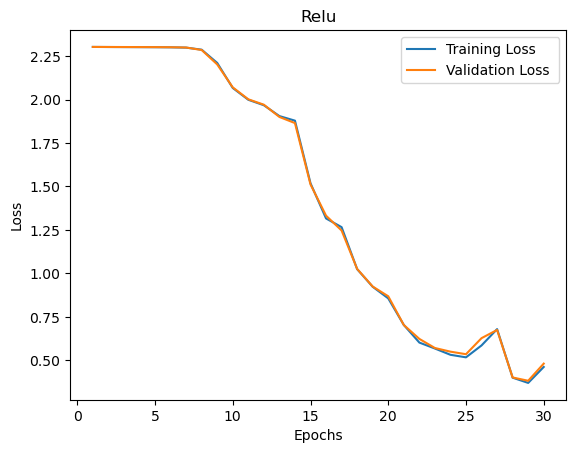

In [19]:
#plot with relu learning rate 0.08
plt.plot(nn.train_losses, label = "Training Loss " )
plt.plot(nn.val_losses, label = "Validation Loss " )
plt.ylabel('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.title("Relu")
plt.show()

In [12]:
import pickle

In [ ]:
# save Relu the trained models

In [18]:
f = open("demofile", "wb")
pickle.dump(nn,f)
f.close()

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for sigmoid activation fn is :
0.11357142857142857


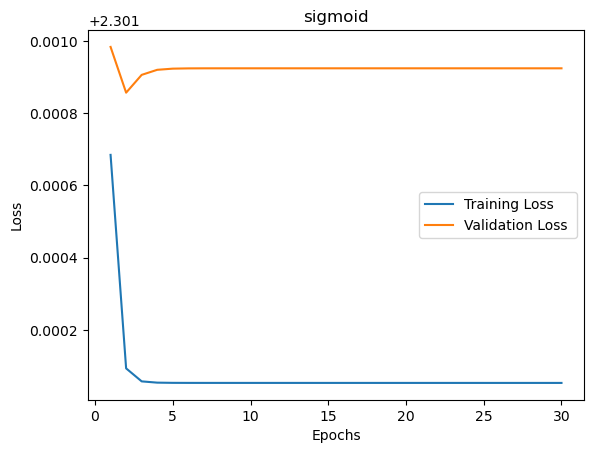

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for tanh activation fn is :
0.11357142857142857


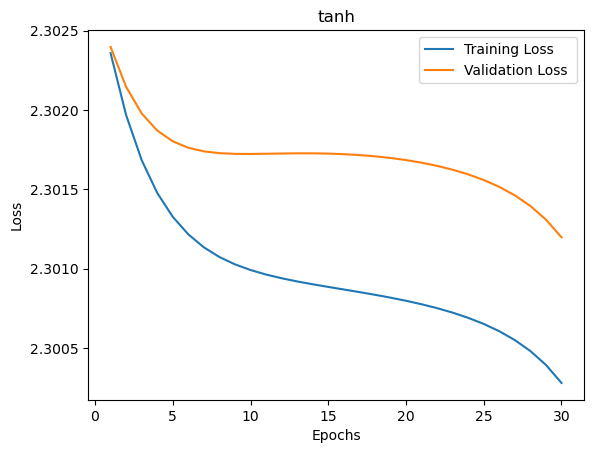

Epoch: 1 Epoch: 2 Epoch: 3 

d:\Desktop\Ml\Ml_assignment\assignment_3\new_Q2\neural_networks.py:77: RuntimeWarning: overflow encountered in exp
  AL = (np.exp(ZL)/(np.sum(np.exp(ZL),axis = 1, keepdims = True)))  # SoftMax
d:\Desktop\Ml\Ml_assignment\assignment_3\new_Q2\neural_networks.py:77: RuntimeWarning: invalid value encountered in true_divide
  AL = (np.exp(ZL)/(np.sum(np.exp(ZL),axis = 1, keepdims = True)))  # SoftMax


Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for linear activation fn is :
0.10128571428571428


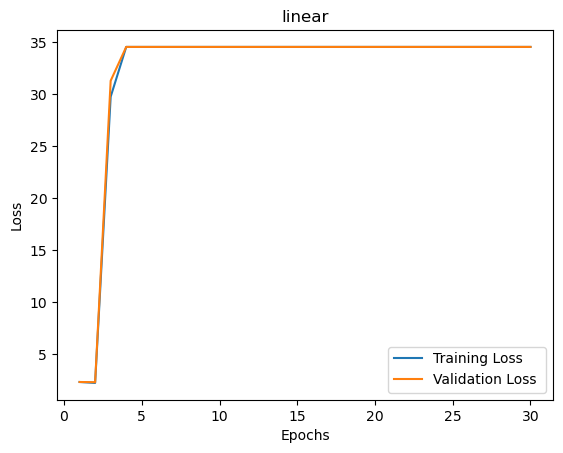

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for leakyrelu activation fn is :
0.10128571428571428


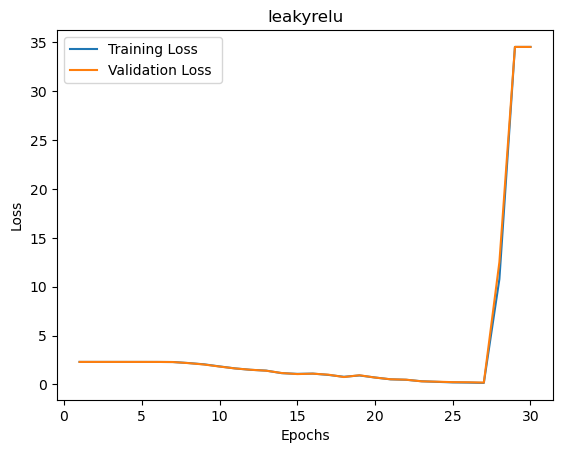

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for softmax activation fn is :
0.11357142857142857


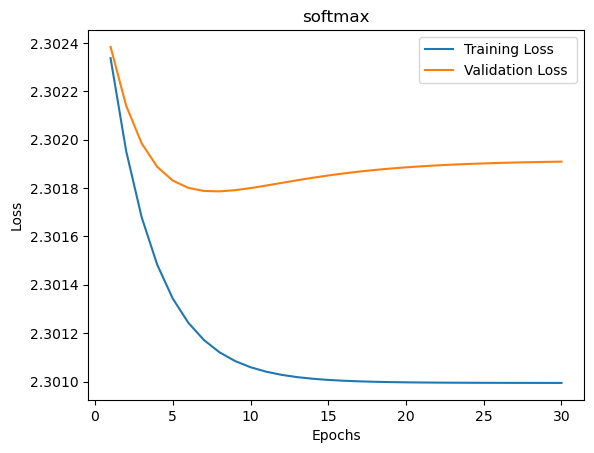

In [8]:
alltheactivations=['sigmoid','tanh','linear','leakyrelu', 'softmax']

for x in alltheactivations:
  nn = neural_networks.NN(6, [784,256, 128, 64, 32,10], x, 0.08, 'normal', len(X_train)//20, 30)
  nn.fit(X_train,Y_train,X_val,Y_val)
  print(f"The Accuracy Score for {x} activation fn is :")
  print(nn.score(X_test,Y_test))
  alltheweights[x] = nn.params
  plt.plot(list(range(1,len(nn.train_losses) + 1)),nn.train_losses, label = "Training Loss " )
  plt.plot(list(range(1,len(nn.val_losses) + 1)),nn.val_losses, label = "Validation Loss " )
  plt.ylabel('Loss')
  plt.legend()
  plt.xlabel('Epochs')
  plt.title(x)
  plt.show()

## with random weight and lr = 0.08

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for relu activation fn is :
0.11357142857142857


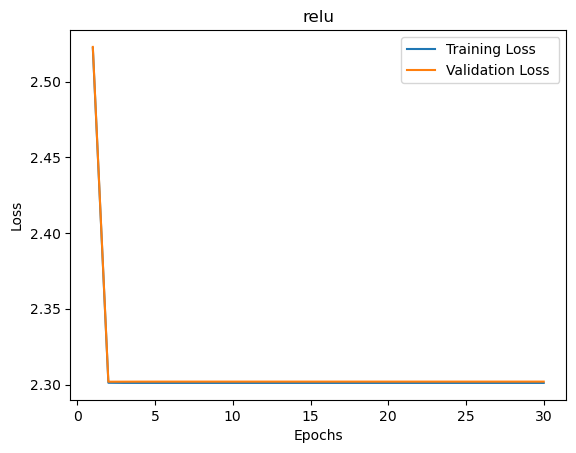

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for sigmoid activation fn is :
0.11357142857142857


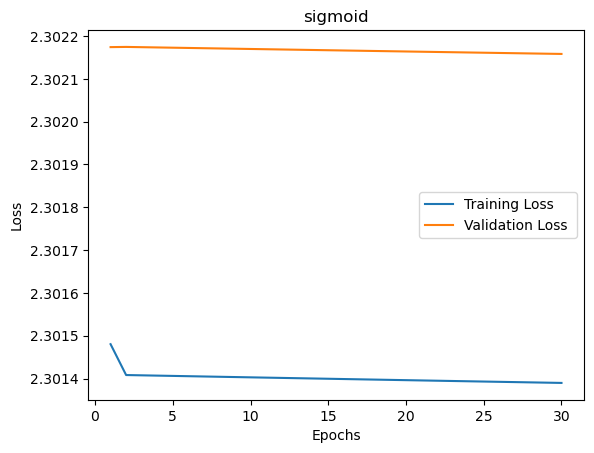

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for tanh activation fn is :
0.11357142857142857


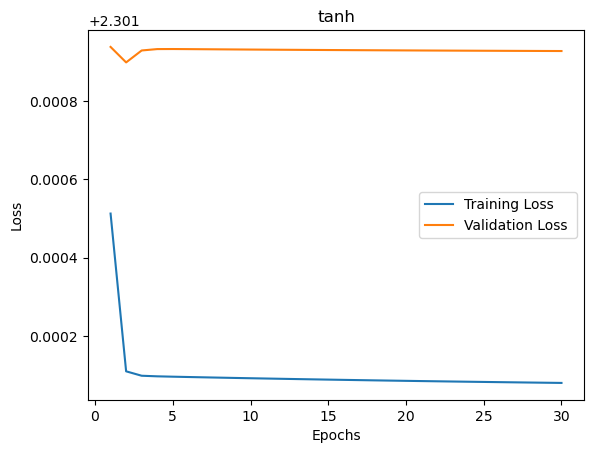

Epoch: 1 

d:\Desktop\Ml\Ml_assignment\assignment_3\new_Q2\neural_networks.py:77: RuntimeWarning: overflow encountered in exp
  AL = (np.exp(ZL)/(np.sum(np.exp(ZL),axis = 1, keepdims = True)))  # SoftMax
d:\Desktop\Ml\Ml_assignment\assignment_3\new_Q2\neural_networks.py:77: RuntimeWarning: invalid value encountered in true_divide
  AL = (np.exp(ZL)/(np.sum(np.exp(ZL),axis = 1, keepdims = True)))  # SoftMax


Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for linear activation fn is :
0.10128571428571428


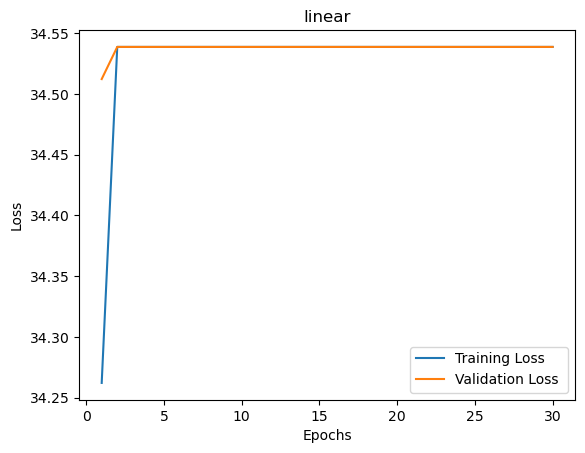

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for leakyrelu activation fn is :
0.10128571428571428


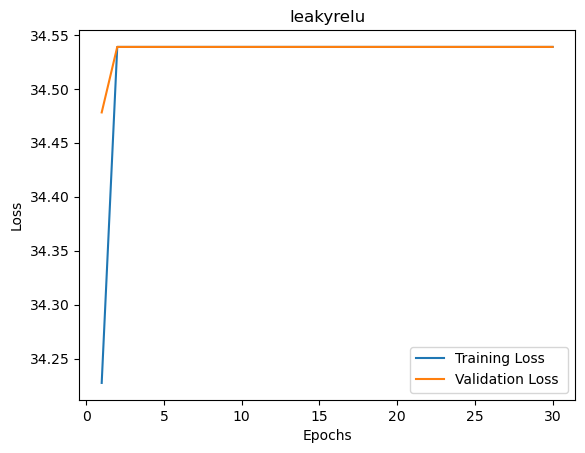

Epoch: 1 Epoch: 2 Epoch: 3 Epoch: 4 Epoch: 5 Epoch: 6 Epoch: 7 Epoch: 8 Epoch: 9 Epoch: 10 Epoch: 11 Epoch: 12 Epoch: 13 Epoch: 14 Epoch: 15 Epoch: 16 Epoch: 17 Epoch: 18 Epoch: 19 Epoch: 20 Epoch: 21 Epoch: 22 Epoch: 23 Epoch: 24 Epoch: 25 Epoch: 26 Epoch: 27 Epoch: 28 Epoch: 29 Epoch: 30 The Accuracy Score for softmax activation fn is :
0.11357142857142857


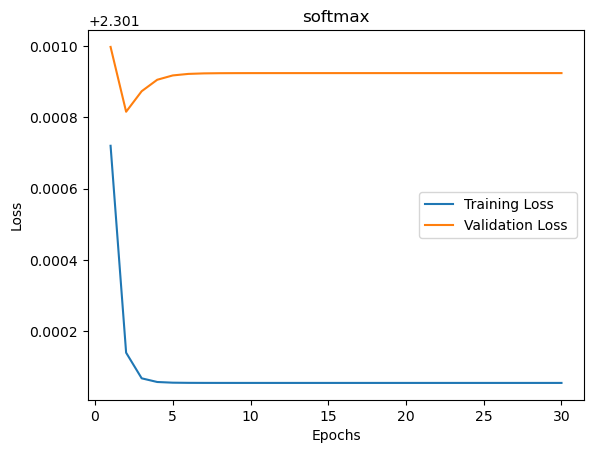

In [20]:
alltheactivations=['relu','sigmoid','tanh','linear','leakyrelu', 'softmax']
alltheweights={}


for x in alltheactivations:
  nn = neural_networks.NN(6, [784,256, 128, 64, 32,10], x, 0.08, 'random', len(X_train)//128, 30)
  nn.fit(X_train,Y_train,X_val,Y_val)
  print(f"The Accuracy Score for {x} activation fn is :")
  print(nn.score(X_test,Y_test))
  alltheweights[x] = nn.params
  plt.plot(list(range(1,len(nn.train_losses) + 1)),nn.train_losses, label = "Training Loss " )
  plt.plot(list(range(1,len(nn.val_losses) + 1)),nn.val_losses, label = "Validation Loss " )
  plt.ylabel('Loss')
  plt.legend()
  plt.xlabel('Epochs')
  plt.title(x)
  plt.show()

(4th) Explination
<ul>
<li>From the above test accuracies, it is quite evident that “ReLU” works best. It has the best test accuracy. </li>
<li>The worst performance is shown in the case of the “linear” activation function as the accuracy is least in that case. It does not perform any activation  and is suitable for single layers only, in our multi-layer case it does not perform well.</li>
<li>For “tanh”, also we weren't able to make a good model. Maybe with more epochs we could get a desired result, but since i was low on computation power. I used only 30 epochs for these experiments.
    </li>
<li>For “relu”, it shows the best behaviour it reacts very fast to the changes and to the data. The only noticeable problem is that after certain number of  epochs we tend to go away from the global </li>
<li>For “linear”, the training loss keeps in decreasing while validation loss fluctuates a bit and then stablizes.</li>
<li>For “sigmoid”, it was stuck at a local minima for a long time and the moment it got out, the training loss started decreasing while validation loss shot and then decreased to a nominal value. </li>
</ul>


# Testing own sklearn models

In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
for activation in ["logistic", "tanh", "identity", "relu"]:
    nn = MLPClassifier(activation=activation, hidden_layer_sizes=[256, 128, 64, 32], learning_rate_init=0.08, max_iter=30, solver="sgd", alpha = 0)
    nn.fit(X_train, Y_train)
    print(f'Test accuracy for {activation} = {nn.score(X_test, Y_test)}')

Test accuracy for logistic = 0.814<br>
Test accuracy for tanh = 0.103<br>
Test accuracy for identity = 0<br>
Test accuracy for relu = 0.861<br>



In case of sigmoid (logistic) sklearn implementation is far superior.
In the case of “linear”, the  accuracy on test in custom implementation comes out to be better than the one in sklearn’s as it did not converge with the given parameters.
In case of tanh we get similar results as 30 epochs are not sufficient which is what we have taken for our experiments.
Sklearn also performs best for relu just like ours and the accuracies are also closeby.
